In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
plt.rcParams["font.size"] = 18

In [2]:
mat = pd.read_csv("student-mat.csv",delimiter=';')
mat

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


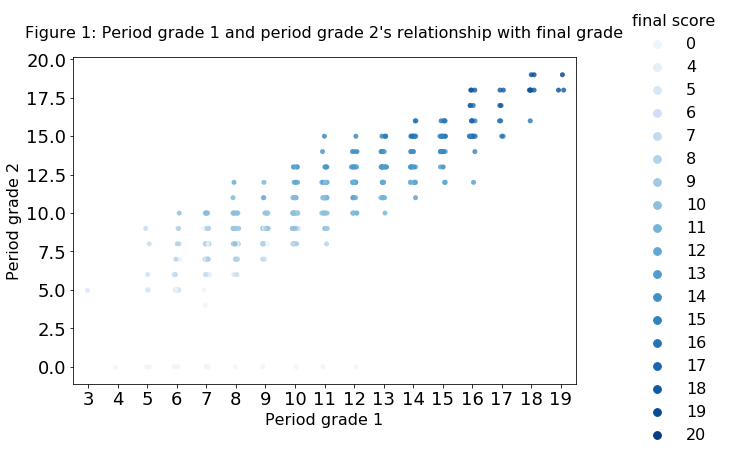

In [3]:
fig1, ax1 = plt.subplots(figsize=(9,6))
fig1 = sns.stripplot(x="G1",y="G2",hue="G3",data=mat, palette="Blues", alpha=0.8)
ax1.legend(title="final score",fontsize=16,title_fontsize=16,loc=(1.1,-0.2),frameon=False)
ax1.set_title("Figure 1: Period grade 1 and period grade 2's relationship with final grade", fontsize=16, pad=20)
fig1.set_xlabel("Period grade 1", fontsize=16)
fig1.set_ylabel("Period grade 2",fontsize=16)
ax1.figure.savefig("figure1.png", bbox_inches = 'tight')

In [4]:
yesornocols = ["schoolsup","famsup","paid","activities","nursery","higher","internet","romantic"]
for i in yesornocols:
    mat[i].replace({"yes":1,"no":0}, inplace=True)

In [5]:
xcols = ["paid","activities", "internet","romantic","famrel","freetime","goout","health","G1","G2"]

1     0.754580
2     0.819385
3     0.877180
4     0.923873
5     0.950294
6     0.973018
7     0.981070
8     0.989094
9     0.995952
10    1.000000
dtype: float64
1     0.197176
2     0.337676
3     0.459515
4     0.563912
5     0.663164
6     0.756185
7     0.840956
8     0.919816
9     0.986092
10    1.000000
dtype: float64


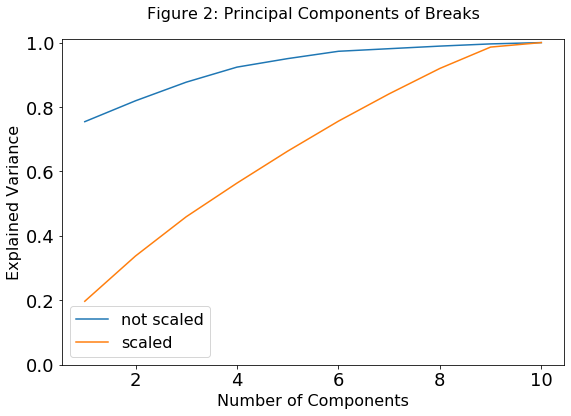

In [6]:
def pca_plot(scale):
    stages = []
    if scale:
        stages.append(("std", StandardScaler()))
    stages.append(("pca", PCA()))
    p = Pipeline(stages)
    p.fit(mat[xcols])
    explained = p["pca"].explained_variance_
    s = pd.Series(explained.cumsum() / explained.sum(),
                      index=range(1, len(xcols)+1))
    print(s)
    return s

fig2, ax2 = plt.subplots(figsize=(9,6))
ax2 = pca_plot(False).plot.line(label="not scaled", ylim=0)
pca_plot(True).plot.line(label="scaled", ax=ax2)
ax2.set_xlabel("Number of Components", fontsize=16)
ax2.set_ylabel("Explained Variance", fontsize=16)
ax2.legend(fontsize=16)
ax2.set_title("Figure 2: Principal Components of Breaks", pad=20, fontsize=16)
ax2.figure.savefig("figure2.png")

In [7]:
train, test = train_test_split(mat, random_state=0)
train

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
81,GP,M,15,U,GT3,T,2,3,other,other,...,5,3,2,1,2,5,4,11,10,11
344,GP,F,18,U,GT3,T,2,3,at_home,other,...,4,3,3,1,2,3,4,11,10,10
336,GP,F,19,R,GT3,A,3,1,services,at_home,...,5,4,3,1,2,5,12,14,13,13
124,GP,F,16,U,GT3,T,2,2,other,other,...,5,4,4,1,1,5,0,8,7,8
250,GP,M,18,U,GT3,T,3,2,services,other,...,4,4,5,2,4,5,0,6,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,GP,F,17,U,GT3,T,3,1,services,services,...,3,4,3,2,3,5,1,12,14,15
192,GP,M,17,U,GT3,T,1,2,at_home,services,...,4,4,4,4,5,5,12,7,8,8
117,GP,M,16,U,GT3,T,3,3,other,services,...,5,4,2,1,1,5,0,13,14,13
47,GP,M,16,U,GT3,T,4,3,health,services,...,4,2,2,1,1,2,4,19,19,20


In [8]:
lr = LinearRegression()
lr.fit(train[xcols], train["G3"])
lr.score(test[xcols], test["G3"])

0.78108552426432

In [9]:
lr1 = Pipeline([("std",StandardScaler()),
              ("lr",LinearRegression())])
lr1.fit(train[xcols], train["G3"])
lr1.score(test[xcols], test["G3"])

0.7810855242643202

In [10]:
lr1["lr"].coef_

array([ 1.06500164e-01, -2.05180186e-01,  2.81832585e-03, -1.70240757e-01,
        8.86360545e-02,  1.95962876e-02, -1.15765799e-03,  1.30956314e-01,
        3.46445129e-01,  3.64986446e+00])

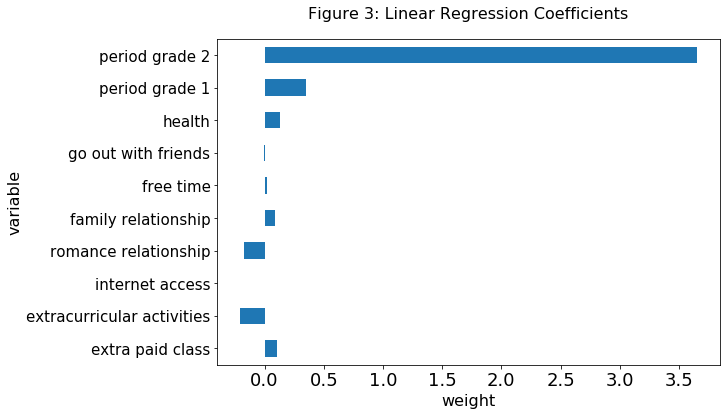

In [11]:
index = ["extra paid class","extracurricular activities","internet access","romance relationship","family relationship","free time","go out with friends","health","period grade 1","period grade 2"]
fig3, ax3 = plt.subplots(figsize=(9,6))
ax3 = pd.Series(lr1["lr"].coef_).plot.barh()
ax3.set_title("Figure 3: Linear Regression Coefficients", pad=20, fontsize=16)
ax3.set_xlabel("weight", fontsize=16)
ax3.set_ylabel("variable", fontsize=16)
ax3.set_yticklabels(index, fontsize=15)
ax3.figure.savefig("figure3.png", bbox_inches = 'tight')